In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Data preprocessing

In [47]:
df_Batters = pd.read_csv("IPL 2022 Batters.csv") 
df_Batters.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51


In [48]:
df_Bowlers = pd.read_csv("IPL Bowlers.csv",index_col=0)
df_Bowlers.head()

,Player,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR
POS,,,,,,,,,
1.0,Yuzvendra Chahal,17.0,17.0,68.0,527.0,27.0,19.51,7.75,15.11
2.0,Wanindu Hasaranga,16.0,16.0,57.0,430.0,26.0,16.53,7.54,13.15
3.0,Kagiso Rabada,13.0,13.0,48.0,406.0,23.0,17.65,8.45,12.52
4.0,Umran Malik,14.0,14.0,49.1,444.0,22.0,20.18,9.03,13.40
5.0,Kuldeep Yadav,14.0,14.0,49.4,419.0,21.0,19.95,8.43,14.19


In [49]:
df_sold = pd.read_csv("ipl2022 - soldplayersipl2022.csv")
df_sold.head()

,Players,Nationality,Type,Price Paid,Team
0,Robin Uthappa,Indian,Batsman,"₹2,00,00,000",CSK
1,Dwayne Bravo,Overseas,All-Rounder,"₹4,40,00,000",CSK
2,Ambati Rayudu,Indian,Wicket Keeper,"₹6,75,00,000",CSK
3,Deepak Chahar,Indian,Bowler,"₹14,00,00,000",CSK
4,C.Hari Nishaanth,Indian,Batsman,"₹20,00,000",CSK


In [50]:

# Load all three datasets
sold_players = pd.read_csv("ipl2022 - soldplayersipl2022.csv")
batters = pd.read_csv("IPL 2022 Batters.csv")
bowlers = pd.read_csv("IPL Bowlers.csv")

# Clean column names
batters.columns = batters.columns.str.strip()
bowlers.columns = bowlers.columns.str.strip()

# Clean the price column
def clean_price(price):
    return int(price.replace('₹', '').replace(',', ''))

sold_players['Price Paid'] = sold_players['Price Paid'].apply(clean_price)

# Get players that are in sold_players AND (batters OR bowlers)
players_in_performance = set(batters['Player']) | set(bowlers['Player'])
common_players = set(sold_players['Players']) & players_in_performance

print(f"Number of players in sold list who have performance data: {len(common_players)}")

# Filter datasets
sold_players_filtered = sold_players[sold_players['Players'].isin(common_players)]
batters_filtered = batters[batters['Player'].isin(common_players)]
bowlers_filtered = bowlers[bowlers['Player'].isin(common_players)]

# Merge sold_players with batters first
merged_with_batters = sold_players_filtered.merge(
    batters_filtered, 
    left_on='Players', 
    right_on='Player', 
    how='left'
)

# Then merge with bowlers data
final_merged_df = merged_with_batters.merge(
    bowlers_filtered,
    left_on='Players',
    right_on='Player',
    how='left',
    suffixes=('_bat', '_bowl')
)

print(f"Final merged dataset shape: {final_merged_df.shape}")
print(f"Players with both batting and bowling data: {final_merged_df[final_merged_df['Player_bowl'].notna()].shape[0]}")
print(f"Players with only batting data: {final_merged_df[final_merged_df['Player_bowl'].isna()].shape[0]}")

# Save the result
final_merged_df.to_csv('IPL_2022_Merged_Performance_Data.csv', index=False)
print("\nMerged data saved to 'IPL_2022_Merged_Performance_Data.csv'")

Number of players in sold list who have performance data: 127
Final merged dataset shape: (127, 27)
Players with both batting and bowling data: 74
Players with only batting data: 53

Merged data saved to 'IPL_2022_Merged_Performance_Data.csv'


In [51]:
final_merged_df.columns

Index(['Players', 'Nationality', 'Type', 'Price Paid', 'Team', 'Player_bat',
       'Mat_bat', 'Inns_bat', 'NO', 'Runs_bat', 'HS', 'Avg_bat', 'BF',
       'SR_bat', '100', '50', '4s', 'POS', 'Player_bowl', 'Mat_bowl',
       'Inns_bowl', 'Ov', 'Runs_bowl', 'Wkts', 'Avg_bowl', 'Econ', 'SR_bowl'],
      dtype='object')

In [52]:
final_merged_df

,Players,Nationality,Type,Price Paid,Team,Player_bat,Mat_bat,Inns_bat,NO,Runs_bat,...,POS,Player_bowl,Mat_bowl,Inns_bowl,Ov,Runs_bowl,Wkts,Avg_bowl,Econ,SR_bowl
0,Robin Uthappa,Indian,Batsman,20000000,CSK,Robin Uthappa,12.0,11.0,0.0,230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dwayne Bravo,Overseas,All-Rounder,44000000,CSK,Dwayne Bravo,10.0,6.0,4.0,23.0,...,17.0,Dwayne Bravo,10.0,10.0,34.2,299.0,16.0,18.68,8.70,12.87
2,Ambati Rayudu,Indian,Wicket Keeper,67500000,CSK,Ambati Rayudu,13.0,11.0,0.0,274.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tushar Deshpande,Indian,Bowler,2000000,CSK,NaN,NaN,NaN,NaN,NaN,...,94.0,Tushar Deshpande,2.0,2.0,7.0,63.0,1.0,63.00,9.00,42.00
4,Shivam Dube,Indian,All-Rounder,40000000,CSK,Shivam Dube,11.0,11.0,1.0,289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Marco Jansen,Overseas,All-Rounder,42000000,SRH,Marco Jansen,8.0,3.0,2.0,9.0,...,46.0,Marco Jansen,8.0,8.0,32.0,274.0,7.0,39.14,8.56,27.42
123,Romario Shepherd,Overseas,All-Rounder,77500000,SRH,Romario Shepherd,3.0,3.0,1.0,58.0,...,79.0,Romario Shepherd,3.0,3.0,9.0,98.0,3.0,32.66,10.88,18.00
124,Fazalhaq Farooqi,Overseas,Bowler,5000000,SRH,Fazalhaq Farooqi,3.0,1.0,1.0,2.0,...,86.0,Fazalhaq Farooqi,3.0,3.0,12.0,110.0,2.0,55.00,9.16,36.00
125,Sean Abbott,Overseas,Bowler,24000000,SRH,Sean Abbott,1.0,1.0,0.0,7.0,...,101.0,Sean Abbott,1.0,1.0,4.0,47.0,1.0,47.00,11.75,24.00


In [53]:
final_merged_df.describe()

,Price Paid,Mat_bat,Inns_bat,NO,Runs_bat,BF,SR_bat,100,50,4s,POS,Mat_bowl,Inns_bowl,Ov,Runs_bowl,Wkts,Avg_bowl,Econ,SR_bowl
count,1.270000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,3.617717e+07,8.756757,6.594595,1.558559,123.594595,92.108108,120.465766,0.009009,0.594595,10.675676,54.891892,8.108108,7.189189,24.866216,211.216216,7.945946,33.625811,9.004865,22.710405
std,3.586220e+07,4.965730,4.616922,1.886241,146.028414,103.364875,48.553627,0.094916,1.131197,13.944802,31.360724,4.838679,4.677769,18.160233,145.637876,6.838433,15.996275,1.802581,11.099879
min,2.000000e+06,1.000000,1.000000,0.000000,1.000000,1.000000,16.660000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.300000,8.000000,1.000000,5.500000,5.500000,3.000000
25%,5.500000e+06,5.000000,2.500000,0.000000,12.500000,13.000000,92.400000,0.000000,0.000000,1.000000,26.250000,5.000000,3.000000,9.000000,73.750000,2.000000,23.332500,7.790000,16.917500
50%,2.000000e+07,8.000000,5.000000,1.000000,48.000000,43.000000,122.870000,0.000000,0.000000,4.000000,57.500000,7.500000,6.000000,19.250000,190.000000,6.000000,29.970000,8.710000,19.355000
75%,6.500000e+07,13.500000,10.000000,2.000000,196.000000,144.000000,143.785000,0.000000,1.000000,16.000000,81.750000,13.000000,11.750000,37.250000,298.250000,12.750000,38.782500,9.847500,25.282500
max,1.525000e+08,17.000000,17.000000,10.000000,508.000000,375.000000,400.000000,1.000000,5.000000,52.000000,103.000000,17.000000,17.000000,68.000000,551.000000,27.000000,79.000000,16.000000,66.000000


In [54]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Players      127 non-null    object 
 1   Nationality  127 non-null    object 
 2   Type         127 non-null    object 
 3   Price Paid   127 non-null    int64  
 4   Team         127 non-null    object 
 5   Player_bat   111 non-null    object 
 6   Mat_bat      111 non-null    float64
 7   Inns_bat     111 non-null    float64
 8   NO           111 non-null    float64
 9   Runs_bat     111 non-null    float64
 10  HS           111 non-null    object 
 11  Avg_bat      111 non-null    object 
 12  BF           111 non-null    float64
 13  SR_bat       111 non-null    float64
 14  100          111 non-null    float64
 15  50           111 non-null    float64
 16  4s           111 non-null    float64
 17  POS          74 non-null     float64
 18  Player_bowl  74 non-null     object 
 19  Mat_bowl

In [55]:
final_merged_df.isnull().sum()

Players         0
Nationality     0
Type            0
Price Paid      0
Team            0
Player_bat     16
Mat_bat        16
Inns_bat       16
NO             16
Runs_bat       16
HS             16
Avg_bat        16
BF             16
SR_bat         16
100            16
50             16
4s             16
POS            53
Player_bowl    53
Mat_bowl       53
Inns_bowl      53
Ov             53
Runs_bowl      53
Wkts           53
Avg_bowl       53
Econ           53
SR_bowl        53
dtype: int64

In [56]:
df = final_merged_df[["Players","Price Paid","Player_bat","Runs_bat","Avg_bat","SR_bat","50","Player_bowl","Wkts","Econ","SR_bowl"]].copy()
df

,Players,Price Paid,Player_bat,Runs_bat,Avg_bat,SR_bat,50,Player_bowl,Wkts,Econ,SR_bowl
0,Robin Uthappa,20000000,Robin Uthappa,230.0,20.91,134.50,2.0,NaN,NaN,NaN,NaN
1,Dwayne Bravo,44000000,Dwayne Bravo,23.0,11.5,95.83,0.0,Dwayne Bravo,16.0,8.70,12.87
2,Ambati Rayudu,67500000,Ambati Rayudu,274.0,24.91,122.32,1.0,NaN,NaN,NaN,NaN
3,Tushar Deshpande,2000000,NaN,NaN,NaN,NaN,NaN,Tushar Deshpande,1.0,9.00,42.00
4,Shivam Dube,40000000,Shivam Dube,289.0,28.9,156.21,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122,Marco Jansen,42000000,Marco Jansen,9.0,9,128.57,0.0,Marco Jansen,7.0,8.56,27.42
123,Romario Shepherd,77500000,Romario Shepherd,58.0,29,141.46,0.0,Romario Shepherd,3.0,10.88,18.00
124,Fazalhaq Farooqi,5000000,Fazalhaq Farooqi,2.0,-,25.00,0.0,Fazalhaq Farooqi,2.0,9.16,36.00
125,Sean Abbott,24000000,Sean Abbott,7.0,7,140.00,0.0,Sean Abbott,1.0,11.75,24.00


In [57]:
df.isnull().sum()

Players         0
Price Paid      0
Player_bat     16
Runs_bat       16
Avg_bat        16
SR_bat         16
50             16
Player_bowl    53
Wkts           53
Econ           53
SR_bowl        53
dtype: int64

In [58]:

# Example: your dataframe has Runs_bat, Avg_bat, SR_bat
# df = pd.read_csv("IPL_batsmen.csv")
# Convert relevant columns to numeric safely
cols = ['Runs_bat', 'Avg_bat', 'SR_bat']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Now fill missing numeric values (NaN) with median or 0
df[cols] = df[cols].fillna(df[cols].median())

# Normalize each metric
df['Runs_norm'] = (df['Runs_bat'] - df['Runs_bat'].min()) / (df['Runs_bat'].max() - df['Runs_bat'].min())
df['Avg_norm'] = (df['Avg_bat'] - df['Avg_bat'].min()) / (df['Avg_bat'].max() - df['Avg_bat'].min())
df['SR_norm']  = (df['SR_bat']  - df['SR_bat'].min())  / (df['SR_bat'].max()  - df['SR_bat'].min())

# Assign weights
w1, w2, w3 = 0.2, 0.4, 0.4

# Compute Batting Performance Score (BPS)
df['BPS'] = w1*df['Runs_norm'] + w2*df['Avg_norm'] + w3*df['SR_norm']
# Sort by BPS to see top performers
top_batsmen = df.sort_values('BPS', ascending=False)
top_batsmen


,Players,Price Paid,Player_bat,Runs_bat,Avg_bat,SR_bat,50,Player_bowl,Wkts,Econ,SR_bowl,Runs_norm,Avg_norm,SR_norm,BPS
26,David Miller,30000000,David Miller,481.0,68.71,142.72,2.0,NaN,NaN,NaN,NaN,0.946746,1.000000,0.328846,0.720888
105,Dinesh Karthik,55000000,Dinesh Karthik,330.0,55.00,183.33,1.0,NaN,NaN,NaN,NaN,0.648915,0.799003,0.434784,0.623298
13,David Warner,62500000,David Warner,432.0,48.00,150.52,5.0,NaN,NaN,NaN,NaN,0.850099,0.696379,0.349194,0.588249
82,Liam Livingstone,115000000,Liam Livingstone,437.0,36.42,182.08,4.0,Liam Livingstone,6.0,8.78,23.00,0.859961,0.526609,0.431523,0.555245
121,Aiden Markram,26000000,Aiden Markram,381.0,47.63,139.05,3.0,Aiden Markram,1.0,10.66,36.00,0.749507,0.690954,0.319273,0.553992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Vaibhav Arora,20000000,Vaibhav Arora,5.0,2.50,38.46,0.0,Vaibhav Arora,3.0,9.19,35.66,0.007890,0.029321,0.056869,0.036054
42,Shivam Mavi,72500000,Shivam Mavi,3.0,1.50,42.85,0.0,Shivam Mavi,5.0,10.31,26.40,0.003945,0.014661,0.068321,0.033981
36,Pradeep Sangwan,2000000,Pradeep Sangwan,2.0,2.00,40.00,0.0,Pradeep Sangwan,3.0,7.22,18.00,0.001972,0.021991,0.060886,0.033545
120,Jagadeesha Suchith,2000000,Jagadeesha Suchith,2.0,1.00,25.00,0.0,Jagadeesha Suchith,7.0,7.77,15.42,0.001972,0.007330,0.021756,0.012029


In [59]:
import pandas as pd

# Suppose your dataframe has: Player, Wkts, Econ, SR_bowl
# df = pd.read_csv("IPL_bowlers.csv")

# Normalize each metric
df['Wkts_norm'] = (df['Wkts'] - df['Wkts'].min()) / (df['Wkts'].max() - df['Wkts'].min())
df['Econ_norm'] = (df['Econ'] - df['Econ'].min()) / (df['Econ'].max() - df['Econ'].min())
df['SR_norm']   = (df['SR_bowl'] - df['SR_bowl'].min()) / (df['SR_bowl'].max() - df['SR_bowl'].min())

# Weights
w1, w2, w3 = 0.5, 0.3, 0.2

# Bowling Performance Score (BPS)
df['BPS_bowl'] = w1*df['Wkts_norm'] + w2*(1 - df['Econ_norm']) + w3*(1 - df['SR_norm'])

# View top bowlers
top_bowlers = df.sort_values('BPS_bowl', ascending=False)
print(top_bowlers[['Players', 'Wkts', 'Econ', 'SR_bowl', 'BPS_bowl']].head(10))


               Players  Wkts  Econ  SR_bowl  BPS_bowl
94    Yuzvendra Chahal  27.0  7.75    15.11  0.897270
103  Wanindu Hasaranga  26.0  7.54    13.15  0.890261
76       Kagiso Rabada  23.0  8.45    12.52  0.808569
17       Kuldeep Yadav  21.0  8.43    14.19  0.765377
106     Josh Hazlewood  20.0  8.10    13.95  0.756337
25      Mohammad Shami  20.0  8.00    18.30  0.745385
104      Harshal Patel  19.0  7.66    16.89  0.740344
93     Prasidh Krishna  19.0  8.28    21.00  0.709582
58         Mohsin Khan  14.0  5.96    14.14  0.701492
41         Umesh Yadav  16.0  7.06    18.00  0.696271


In [60]:
df.isnull().sum()

Players         0
Price Paid      0
Player_bat     16
Runs_bat        0
Avg_bat         0
SR_bat          0
50             16
Player_bowl    53
Wkts           53
Econ           53
SR_bowl        53
Runs_norm       0
Avg_norm        0
SR_norm        53
BPS             0
Wkts_norm      53
Econ_norm      53
BPS_bowl       53
dtype: int64

In [61]:
df

,Players,Price Paid,Player_bat,Runs_bat,Avg_bat,SR_bat,50,Player_bowl,Wkts,Econ,SR_bowl,Runs_norm,Avg_norm,SR_norm,BPS,Wkts_norm,Econ_norm,BPS_bowl
0,Robin Uthappa,20000000,Robin Uthappa,230.0,20.91,134.50,2.0,NaN,NaN,NaN,NaN,0.451677,0.299223,NaN,0.332986,NaN,NaN,NaN
1,Dwayne Bravo,44000000,Dwayne Bravo,23.0,11.50,95.83,0.0,Dwayne Bravo,16.0,8.70,12.87,0.043393,0.161267,0.156667,0.155796,0.576923,0.304762,0.665700
2,Ambati Rayudu,67500000,Ambati Rayudu,274.0,24.91,122.32,1.0,NaN,NaN,NaN,NaN,0.538462,0.357865,NaN,0.361090,NaN,NaN,NaN
3,Tushar Deshpande,2000000,NaN,48.0,16.71,122.87,NaN,Tushar Deshpande,1.0,9.00,42.00,0.092702,0.237648,0.619048,0.224426,0.000000,0.333333,0.276190
4,Shivam Dube,40000000,Shivam Dube,289.0,28.90,156.21,2.0,NaN,NaN,NaN,NaN,0.568047,0.416361,NaN,0.425769,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Marco Jansen,42000000,Marco Jansen,9.0,9.00,128.57,0.0,Marco Jansen,7.0,8.56,27.42,0.015779,0.124615,0.387619,0.169776,0.230769,0.291429,0.450432
123,Romario Shepherd,77500000,Romario Shepherd,58.0,29.00,141.46,0.0,Romario Shepherd,3.0,10.88,18.00,0.112426,0.417827,0.238095,0.319840,0.076923,0.512381,0.337128
124,Fazalhaq Farooqi,5000000,Fazalhaq Farooqi,2.0,16.71,25.00,0.0,Fazalhaq Farooqi,2.0,9.16,36.00,0.001972,0.237648,0.523810,0.104156,0.038462,0.348571,0.309897
125,Sean Abbott,24000000,Sean Abbott,7.0,7.00,140.00,0.0,Sean Abbott,1.0,11.75,24.00,0.011834,0.095294,0.333333,0.169185,0.000000,0.595238,0.254762


In [62]:
df_final = df[["Players","Price Paid","BPS","BPS_bowl"]].copy()

In [63]:
df_final.isnull().sum()

Players        0
Price Paid     0
BPS            0
BPS_bowl      53
dtype: int64

In [64]:
df_final.describe()

,Price Paid,BPS,BPS_bowl
count,1.270000e+02,127.000000,74.000000
mean,3.617717e+07,0.259250,0.470864
std,3.586220e+07,0.145149,0.171209
min,2.000000e+06,0.000394,0.169048
25%,5.500000e+06,0.152201,0.331295
50%,2.000000e+07,0.224426,0.438701
75%,6.500000e+07,0.347931,0.589734
max,1.525000e+08,0.720888,0.897270


In [65]:
mean_BPS = df_final["BPS"].mean()
df_final.fillna({"BPS":mean_BPS},inplace=True)

In [66]:
mean_BPS = df_final["BPS_bowl"].mean()
df_final.fillna({"BPS_bowl":mean_BPS},inplace=True)

In [67]:
df_final.isnull().sum()

Players       0
Price Paid    0
BPS           0
BPS_bowl      0
dtype: int64

In [68]:
df_final.dtypes

Players        object
Price Paid      int64
BPS           float64
BPS_bowl      float64
dtype: object

In [77]:
df_final[["Price Paid norm"]] = scaler.fit_transform(df_final[["Price Paid"]])


In [78]:
x = df_final[["Price Paid norm","BPS"]]
cm = x.corr()
cm

,Price Paid norm,BPS
Price Paid norm,1.000000,0.340289
BPS,0.340289,1.000000


In [79]:
df_final.describe()

,Price Paid,BPS,BPS_bowl,Price Paid norm,BPS_final,Price Paid_norm
count,1.270000e+02,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.617717e+07,0.259250,0.470864,0.227091,0.365057,0.227091
std,3.586220e+07,0.145149,0.130318,0.238287,0.091984,0.238287
min,2.000000e+06,0.000394,0.169048,0.000000,0.178296,0.000000
25%,5.500000e+06,0.152201,0.421364,0.023256,0.298126,0.023256
50%,2.000000e+07,0.224426,0.470864,0.119601,0.360372,0.119601
75%,6.500000e+07,0.347931,0.470864,0.418605,0.437403,0.418605
max,1.525000e+08,0.720888,0.897270,1.000000,0.595876,1.000000


In [80]:
df_final["BPS_final"] = (df_final["BPS"]+df_final["BPS_bowl"])/2

In [73]:

# Assuming df_merged has columns: Player, Price Paid, BPS
# Step 1️⃣: Create Price Category based on domain thresholds (in crores)
def price_category(price):
    if price < 2e7:         # < 2 crore
        return 'Low'
    elif price <= 7e7:      # 2–7 crore
        return 'Medium'
    else:                   # > 7 crore
        return 'High'

df_final['Price_Category'] = df_final['Price Paid'].apply(price_category)

# Step 2️⃣: Check correlation overall
overall_corr = df_final['Price Paid'].corr(df_final['BPS_final'])

# Step 3️⃣: Check correlation within each category
corr_by_group = df_final.groupby('Price_Category').apply(
    lambda x: x['Price Paid'].corr(x['BPS_final'])
).reset_index(name='Correlation')

# Step 4️⃣: Display results
print("🔹 Overall Correlation between Price Paid and BPS:", overall_corr)
print("\n🔹 Correlation within each Price Category:")
print(corr_by_group)

🔹 Overall Correlation between Price Paid and BPS: 0.49835297981346544

🔹 Correlation within each Price Category:
  Price_Category  Correlation
0           High     0.317972
1            Low    -0.003508
2         Medium     0.406183


C:\Users\Sonu Kumar\AppData\Local\Temp\ipykernel_5204\1261994059.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_group = df_final.groupby('Price_Category').apply(


In [74]:

# ✅ Step 1: Price category thresholds
def price_category(price):
    if price < 2e7:         # < 2 crore
        return 'Low'
    elif price <= 7e7:      # 2–7 crore
        return 'Medium'
    else:                   # > 7 crore
        return 'High'

df_final['Price_Category'] = df_final['Price Paid'].apply(price_category)

# ✅ Step 2: Normalize Price Paid
df_final['Price Paid_norm'] = (df_final['Price Paid'] - df_final['Price Paid'].min()) / (
                                df_final['Price Paid'].max() - df_final['Price Paid'].min())

# ✅ Step 3: Function to calculate R² for each group
def compute_r2(df):
    X = df[['Price Paid_norm']].values
    y = df['BPS_final'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

# ✅ Step 4: Compute R² per group
r2_by_group = df_final.groupby('Price_Category').apply(compute_r2).reset_index(name='R2_Score')

# ✅ Step 5: Overall R² as well
X_all = df_final[['Price Paid_norm']].values
y_all = df_final['BPS_final'].values
model_all = LinearRegression().fit(X_all, y_all)
r2_overall = r2_score(y_all, model_all.predict(X_all))

# ✅ Step 6: Display
print("🔹 Overall R² Score:", round(r2_overall, 3))
print("\n🔹 R² Score by Price Category:")
print(r2_by_group)


🔹 Overall R² Score: 0.248

🔹 R² Score by Price Category:
  Price_Category  R2_Score
0           High  0.101106
1            Low  0.000012
2         Medium  0.164985


C:\Users\Sonu Kumar\AppData\Local\Temp\ipykernel_5204\3113557940.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r2_by_group = df_final.groupby('Price_Category').apply(compute_r2).reset_index(name='R2_Score')


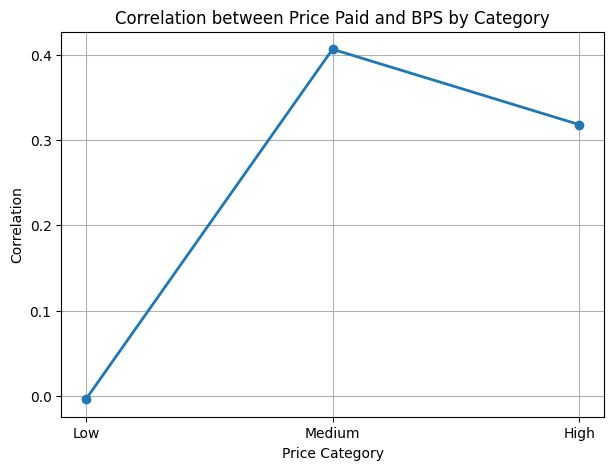

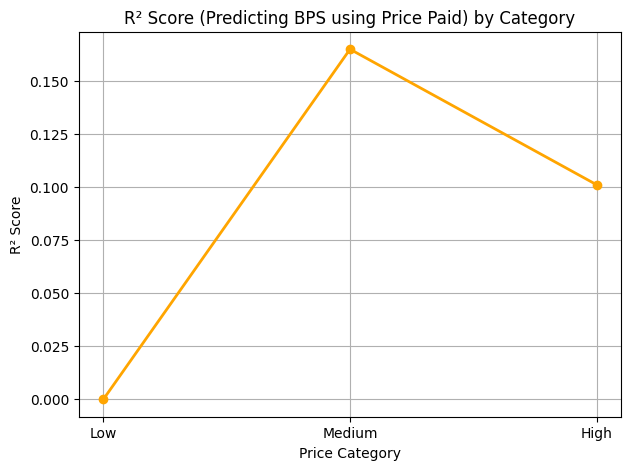

In [75]:

# Data you already have
correlation_data = {
    'Low': -0.003508,
    'Medium': 0.406183,
    'High': 0.317972
}

r2_data = {
    'Low': 0.000012 ,
    'Medium': 0.164985,
    'High': 0.101106
}

categories = list(correlation_data.keys())
corr_values = list(correlation_data.values())
r2_values = list(r2_data.values())

# Plot 1: Correlation Line Plot
plt.figure(figsize=(7, 5))
plt.plot(categories, corr_values, marker='o', linestyle='-', linewidth=2)
plt.title('Correlation between Price Paid and BPS by Category')
plt.xlabel('Price Category')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# Plot 2: R² Score Line Plot
plt.figure(figsize=(7, 5))
plt.plot(categories, r2_values, marker='o', linestyle='-', color='orange', linewidth=2)
plt.title('R² Score (Predicting BPS using Price Paid) by Category')
plt.xlabel('Price Category')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()
